# 1. Package Loading

In [1]:
#Basic
import pandas as pd
import numpy as np 
import random   
import os
import time
from datetime import timedelta
import pickle

In [30]:

#ML
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import mean_squared_error
from math import sqrt


In [3]:
#Visualization               
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Data Loading

In [4]:
data_dir = '/Users/chiyunchen/pythonProject/ML_hw1/data'
!ls '/Users/chiyunchen/pythonProject/ML_hw1/data'

data_mnist.csv data_mnist.zip test_mnist.csv test_mnist.zip


In [5]:
start_time = time.time()
data = pd.read_csv(data_dir+'/data_mnist.csv')
test = pd.read_csv(data_dir+'/test_mnist.csv')
print("--- %s time elapsed ---" % str(timedelta(seconds=time.time() - start_time)))

--- 0:00:01.848464 time elapsed ---


Check out the look of data

In [6]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Data Structure
- 28 x 28 = 784 pixel
- pixel-value 0-255
- x = i * 28 + j,  i and j are integers between 0 and 27
- row i and column j 
- For example,  pixel31 = 4th col, 2nd row

In [8]:
#Convert the dataframe into a numpy array (matrix)
start_time = time.time()

mnist = np.array(data)
mnist_prediction= np.array(test)
X, y= mnist[:,1:], mnist[:,0]
print("X Data Shape is ", X.shape)
print("y Data Shape is ", y.shape)
print("The Data Shape for Prediction is ",mnist_prediction.shape)

print("--- %s time elapsed ---" % str(timedelta(seconds=time.time() - start_time)))

X Data Shape is  (42000, 784)
y Data Shape is  (42000,)
The Data Shape for Prediction is  (10000, 784)
--- 0:00:00.134430 time elapsed ---


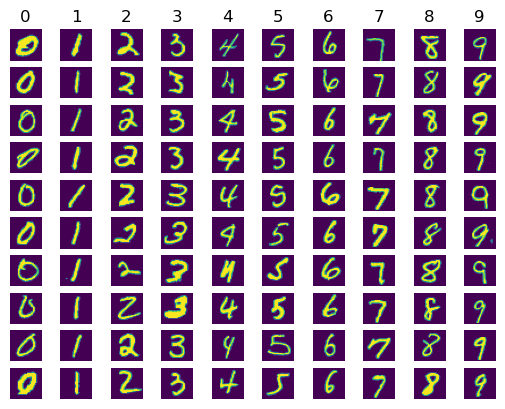

--- 0:00:01.563025 time elapsed ---


In [9]:
#Visualize the pixels data, randomly pick some samples
#Reshape the array data into 28x28 matrix and show the image by matplotlib package
start_time = time.time()

categories = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
num_cat = len(categories)
samples = 10
for element, cat in enumerate(categories):
    idxs = np.nonzero([i == element for i in y])
    idxs = np.random.choice(idxs[0], samples, replace=False)
    for i , idx in enumerate(idxs):
        plt_idx = i * num_cat + element + 1
        plt.subplot(samples, num_cat, plt_idx)
        plt.imshow(X[idx].reshape((28, 28)))
        plt.axis("off")
        if i == 0:
            plt.title(cat)
        
plt.show()

print("--- %s time elapsed ---" % str(timedelta(seconds=time.time() - start_time)))

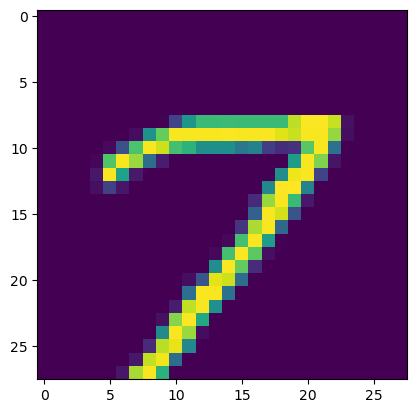

--- 0:00:00.112070 time elapsed ---


In [10]:
# Randomly pick one in the dataset we will need to predict
# And visualize the image
start_time = time.time()

plt.imshow(mnist_prediction[6666].reshape((28, 28)))
plt.show()

print("--- %s time elapsed ---" % str(timedelta(seconds=time.time() - start_time)))

# 3. Model

## 3.0 Normalization

In [11]:
#Model Training dataset
norm_X = X/ 255.0

## 3.1 Split Data

Spilt the data into training and testing part.
Testing part still from mnist data but for evaluate the model

In [ ]:
start_time = time.time()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state = 41, stratify=y)
print("--- %s time elapsed ---" % str(timedelta(seconds=time.time() - start_time)))

In [12]:
start_time = time.time()

#Using the normalized data to prepare for traning
X_train,X_test,y_train,y_test = train_test_split(norm_X,y,test_size=0.25,random_state = 41, stratify=y)
#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state = 41, stratify=y)

print("--- %s time elapsed ---" % str(timedelta(seconds=time.time() - start_time)))

--- 0:00:00.309896 time elapsed ---


## 3.2 Finding the Best Model

### Using Plot to Find the Best K

In [13]:
error = []

# Calculating error for K values between 1 and 40
# There are 4,2000 * 0.75 = 31,500 images in training data
# Rule of thumb is k < sqrt(n), which n is the number of training sample
# In here k < 178, lets find out the result of 1 to 40 first, since it takes many times to train
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

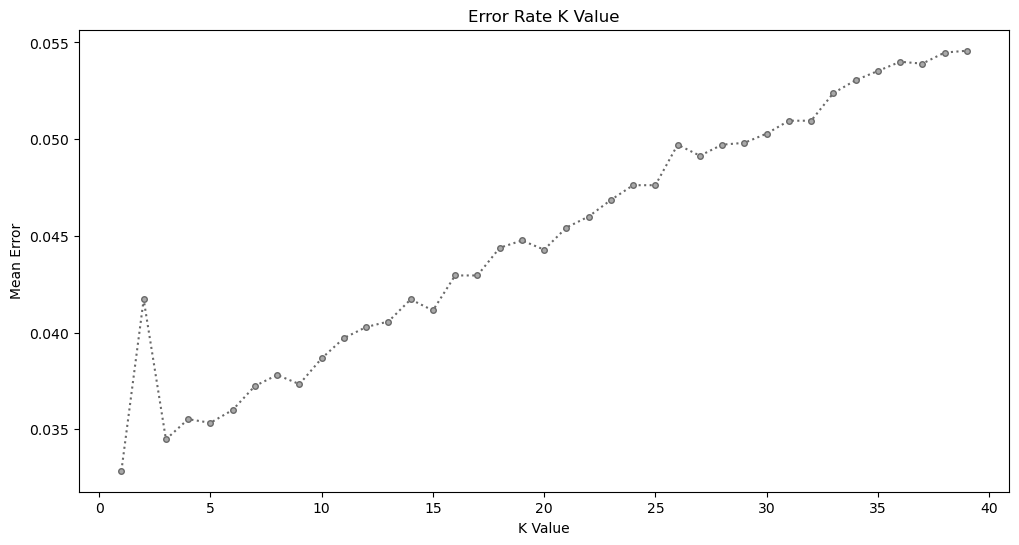

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='dimgray', linestyle='dotted', marker='.',
         markerfacecolor='darkgrey', markersize = 8)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()

### Model fitting with K-cross Validation and GridSearchCV

In [15]:
# In previous section we know the best model may happened when n_neighbors < 10 
# Let's use GridSearchCV() to double check
knn = KNeighborsClassifier()
parameters = {"n_neighbors": range(1, 15)}
gridsearch = GridSearchCV(knn, parameters,cv=10,scoring='accuracy',verbose=1)
gridsearch_result = gridsearch.fit(X_train, y_train)

Fitting 10 folds for each of 14 candidates, totalling 140 fits


In [17]:
# Get the best Parameters of the Model
accuracy = gridsearch_result.best_score_*100
print("Best Parameters of the Model is: ",gridsearch_result.best_params_)
print("Accuarcy : {:.2f}%".format(accuracy))

Best Parameters of the Model is:  {'n_neighbors': 3}
Accuarcy : 96.59%


### Checking Accuracy on Test Data

#### n_neighbors=3

In [26]:
start_time = time.time()

knn_3 = KNeighborsClassifier(n_neighbors=3,weights="distance")
knn_3.fit(X_train, y_train)

print("--- %s time elapsed ---" % str(timedelta(seconds=time.time() - start_time)))

--- 0:00:00.021538 time elapsed ---


In [28]:
y_pred = knn_3.predict(X_test)

In [42]:
class_report_3 = classification_report(y_test, y_pred)
accuracy_3 = accuracy_score(y_test,y_pred)*100
precision_3 = precision_score(y_test,y_pred,average='micro')*100
recall_3 = recall_score(y_test,y_pred,average='micro')*100

In [43]:
print(class_report_3)
print("Accuracy of testing dataset of n_neighbors=3 is : {:.2f}%".format(accuracy_3) )
print("Precision of testing dataset of n_neighbors=3 is : {:.2f}%".format(precision_3) )
print("Recall of testing dataset of n_neighbors=3 is : {:.2f}%".format(accuracy_3) )

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1033
           1       0.96      0.99      0.98      1171
           2       0.98      0.96      0.97      1044
           3       0.97      0.97      0.97      1088
           4       0.98      0.96      0.97      1018
           5       0.96      0.96      0.96       949
           6       0.98      0.98      0.98      1034
           7       0.95      0.97      0.96      1100
           8       0.98      0.93      0.95      1016
           9       0.95      0.96      0.95      1047

    accuracy                           0.97     10500
   macro avg       0.97      0.97      0.97     10500
weighted avg       0.97      0.97      0.97     10500

Accuracy of testing dataset of n_neighbors=3 is : 96.79%
Precision of testing dataset of n_neighbors=3 is : 96.79%
Recall of testing dataset of n_neighbors=3 is : 96.79%


#### n_neighbors=4

In [25]:
start_time = time.time()

knn_4 = KNeighborsClassifier(n_neighbors=3,weights="distance")
knn_4.fit(X_train, y_train)

print("--- %s time elapsed ---" % str(timedelta(seconds=time.time() - start_time)))

--- 0:00:00.019586 time elapsed ---


In [44]:
y_pred = knn_4.predict(X_test)

In [45]:
class_report_4 = classification_report(y_test, y_pred)
accuracy_4 = accuracy_score(y_test,y_pred)*100
precision_4 = precision_score(y_test,y_pred,average='micro')*100
recall_4 = recall_score(y_test,y_pred,average='micro')*100

In [46]:
print(class_report_4)
print("Accuracy of testing dataset of n_neighbors=3 is : {:.2f}%".format(accuracy_4) )
print("Precision of testing dataset of n_neighbors=3 is : {:.2f}%".format(precision_4) )
print("Recall of testing dataset of n_neighbors=3 is : {:.2f}%".format(accuracy_4) )

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1033
           1       0.96      0.99      0.98      1171
           2       0.98      0.96      0.97      1044
           3       0.97      0.97      0.97      1088
           4       0.98      0.96      0.97      1018
           5       0.97      0.96      0.96       949
           6       0.98      0.98      0.98      1034
           7       0.95      0.97      0.96      1100
           8       0.99      0.93      0.96      1016
           9       0.94      0.96      0.95      1047

    accuracy                           0.97     10500
   macro avg       0.97      0.97      0.97     10500
weighted avg       0.97      0.97      0.97     10500

Accuracy of testing dataset of n_neighbors=3 is : 96.83%
Precision of testing dataset of n_neighbors=3 is : 96.83%
Recall of testing dataset of n_neighbors=3 is : 96.83%


#### n_neighbors=5

In [47]:
start_time = time.time()

knn_5 = KNeighborsClassifier(n_neighbors=5,weights="distance")
knn_5.fit(X_train, y_train)

print("--- %s time elapsed ---" % str(timedelta(seconds=time.time() - start_time)))

--- 0:00:00.023425 time elapsed ---


In [48]:
y_pred = knn_5.predict(X_test)

In [49]:
class_report_5 = classification_report(y_test, y_pred)
accuracy_5 = accuracy_score(y_test,y_pred)*100
precision_5 = precision_score(y_test,y_pred,average='micro')*100
recall_5 = recall_score(y_test,y_pred,average='micro')*100

In [50]:
print(class_report_5)
print("Accuracy of testing dataset of n_neighbors=3 is : {:.2f}%".format(accuracy_5) )
print("Precision of testing dataset of n_neighbors=3 is : {:.2f}%".format(precision_5) )
print("Recall of testing dataset of n_neighbors=3 is : {:.2f}%".format(accuracy_5) )

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1033
           1       0.95      0.99      0.97      1171
           2       0.99      0.95      0.97      1044
           3       0.96      0.96      0.96      1088
           4       0.98      0.96      0.97      1018
           5       0.96      0.96      0.96       949
           6       0.98      0.99      0.98      1034
           7       0.95      0.97      0.96      1100
           8       0.99      0.92      0.95      1016
           9       0.94      0.97      0.95      1047

    accuracy                           0.97     10500
   macro avg       0.97      0.97      0.97     10500
weighted avg       0.97      0.97      0.97     10500

Accuracy of testing dataset of n_neighbors=3 is : 96.66%
Precision of testing dataset of n_neighbors=3 is : 96.66%
Recall of testing dataset of n_neighbors=3 is : 96.66%


Consider the Result, I will chose n_neighbors=4 has the best knn model

## 3.4 Model Saving

In [51]:
pickle.dump(knn_4, open("Best_knn_model.pkl", "wb"))

## 3.5 Model Loading

In [52]:
loaded_model = pickle.load(open("Best_knn_model.pkl", 'rb'))

# 5. Prediction

Normalization

In [53]:
mnist_prediction = mnist_prediction/255.0

Prediction

In [54]:
results = loaded_model.predict(mnist_prediction)

# 6. Submission

In [55]:
sub = pd.DataFrame({'ImageId':np.arange(10000),'Label':results.squeeze().astype(np.int)})
sub["ImageId"]=sub["ImageId"]+1
sub.head()

,ImageId,Label
0,1,7
1,2,2
2,3,1
3,4,0
4,5,4


In [65]:
print(sub.iloc[777])

ImageId    778
Label        1
Name: 777, dtype: int64


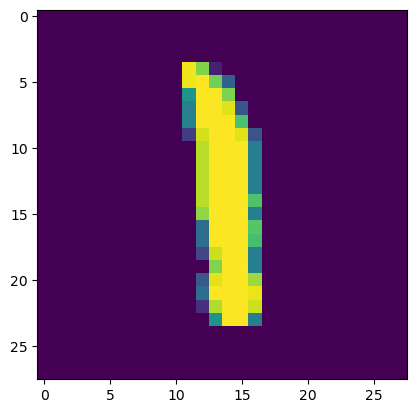

In [66]:
plt.imshow(mnist_prediction[777].reshape((28, 28)))
plt.show()

In [68]:
sub.to_csv('hw01_submission.csv', index=False)